# Load data directory from Kaggle using API



In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "mdazizulhakim052" # username from the json file
os.environ['KAGGLE_KEY'] = "2823e1cbb4a221cfa73291d5cf99212e" # key from the json file

!kaggle datasets download -d mdwaquarazam/microorganism-image-classification


microorganism-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip data
from zipfile import ZipFile
file_name = "/content/microorganism-image-classification.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


# Exploratory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Micro_Organism')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Micro_Organism"))
file_count = len(files)

['Spiral_bacteria', 'Spherical_bacteria', 'Amoeba', 'Yeast', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Euglena']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Micro_Organism'
base_dir = '/content/bacteria-data/'
os.mkdir(base_dir)

In [ ]:
#create two folders in bacteria-data (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create eight folders('Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena')

train_Spiral_dir = os.path.join(train_dir, 'Spiral_bacteria')
os.mkdir(train_Spiral_dir)

train_Paramecium_dir = os.path.join(train_dir, 'Paramecium')
os.mkdir(train_Paramecium_dir)

train_Yeast_dir = os.path.join(train_dir, 'Yeast')
os.mkdir(train_Yeast_dir)

train_Amoeba_dir = os.path.join(train_dir, 'Amoeba')
os.mkdir(train_Amoeba_dir)

train_Rod_dir = os.path.join(train_dir, 'Rod_bacteria')
os.mkdir(train_Rod_dir)

train_Spherical_dir = os.path.join(train_dir, 'Spherical_bacteria')
os.mkdir(train_Spherical_dir)

train_Hydra_dir = os.path.join(train_dir, 'Hydra')
os.mkdir(train_Hydra_dir)

train_Euglena_dir = os.path.join(train_dir, 'Euglena')
os.mkdir(train_Euglena_dir)

#Under validation folder create eight folders('Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena') 

validation_Spiral_dir = os.path.join(validation_dir, 'Spiral_bacteria')
os.mkdir(validation_Spiral_dir)

validation_Paramecium_dir = os.path.join(validation_dir, 'Paramecium')
os.mkdir(validation_Paramecium_dir)

validation_Yeast_dir = os.path.join(validation_dir, 'Yeast')
os.mkdir(validation_Yeast_dir)

validation_Amoeba_dir = os.path.join(validation_dir, 'Amoeba')
os.mkdir(validation_Amoeba_dir)

validation_Rod_dir = os.path.join(validation_dir, 'Rod_bacteria')
os.mkdir(validation_Rod_dir)

validation_Spherical_dir = os.path.join(validation_dir, 'Spherical_bacteria')
os.mkdir(validation_Spherical_dir)

validation_Hydra_dir = os.path.join(validation_dir, 'Hydra')
os.mkdir(validation_Hydra_dir)

validation_Euglena_dir = os.path.join(validation_dir, 'Euglena')
os.mkdir(validation_Euglena_dir)


In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
AMOEBA_SOURCE_DIR = '/content/Micro_Organism/Amoeba/'
EUGLENA_SOURCE_DIR = '/content/Micro_Organism/Euglena/'
HYDRA_SOURCE_DIR = '/content/Micro_Organism/Hydra/'
PARAMECIUM_SOURCE_DIR = '/content/Micro_Organism/Paramecium/'
ROD_SOURCE_DIR = '/content/Micro_Organism/Rod_bacteria/'
SPHERICAL_SOURCE_DIR = '/content/Micro_Organism/Spherical_bacteria/'
SPIRAL_SOURCE_DIR = '/content/Micro_Organism/Spiral_bacteria/'
YEAST_SOURCE_DIR = '/content/Micro_Organism/Yeast/'

TRAINING_AMOEBA_DIR = '/content/bacteria-data/train/Amoeba/'
TRAINING_EUGLENA_DIR = '/content/bacteria-data/train/Euglena/'
TRAINING_HYDRA_DIR = '/content/bacteria-data/train/Hydra/'
TRAINING_PARAMECIUM_DIR = '/content/bacteria-data/train/Paramecium/'
TRAINING_ROD_DIR = '/content/bacteria-data/train/Rod_bacteria/'
TRAINING_SPHERICAL_DIR = '/content/bacteria-data/train/Spherical_bacteria/'
TRAINING_SPIRAL_DIR = '/content/bacteria-data/train/Spiral_bacteria/'
TRAINING_YEAST_DIR = '/content/bacteria-data/train/Yeast/'

VALID_AMOEBA_DIR = '/content/bacteria-data/validation/Amoeba/'
VALID_EUGLENA_DIR = '/content/bacteria-data/validation/Euglena/'
VALID_HYDRA_DIR = '/content/bacteria-data/validation/Hydra/'
VALID_PARAMECIUM_DIR = '/content/bacteria-data/validation/Paramecium/'
VALID_ROD_DIR = '/content/bacteria-data/validation/Rod_bacteria/'
VALID_SPHERICAL_DIR = '/content/bacteria-data/validation/Spherical_bacteria/'
VALID_SPIRAL_DIR = '/content/bacteria-data/validation/Spiral_bacteria/'
VALID_YEAST_DIR = '/content/bacteria-data/validation/Yeast/'


In [ ]:
import os
import random
from shutil import copyfile

split_size = .80

split_data(AMOEBA_SOURCE_DIR, TRAINING_AMOEBA_DIR, VALID_AMOEBA_DIR, split_size)
split_data(EUGLENA_SOURCE_DIR, TRAINING_EUGLENA_DIR, VALID_EUGLENA_DIR, split_size)
split_data(HYDRA_SOURCE_DIR, TRAINING_HYDRA_DIR, VALID_HYDRA_DIR, split_size)
split_data(PARAMECIUM_SOURCE_DIR, TRAINING_PARAMECIUM_DIR, VALID_PARAMECIUM_DIR, split_size)
split_data(ROD_SOURCE_DIR, TRAINING_ROD_DIR, VALID_ROD_DIR, split_size)
split_data(SPHERICAL_SOURCE_DIR, TRAINING_SPHERICAL_DIR, VALID_SPHERICAL_DIR, split_size)
split_data(SPIRAL_SOURCE_DIR, TRAINING_SPIRAL_DIR, VALID_SPIRAL_DIR, split_size)
split_data(YEAST_SOURCE_DIR, TRAINING_YEAST_DIR, VALID_YEAST_DIR, split_size)


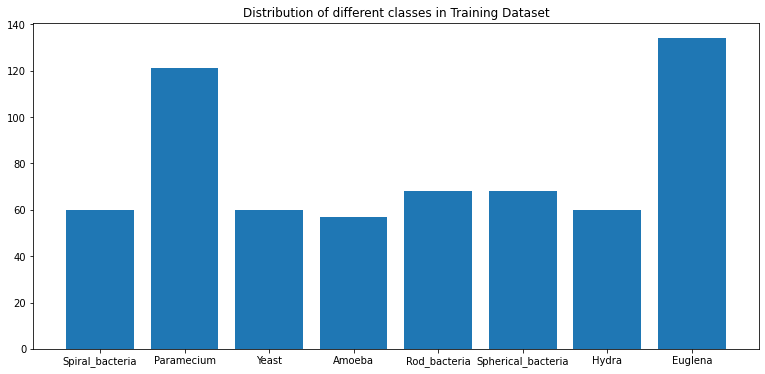

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

#Training data
image_folder = ['Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/bacteria-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(13, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/bacteria-data/train/'+i+'/'))))

Training Spiral_bacteria images are: 60
Training Paramecium images are: 121
Training Yeast images are: 60
Training Amoeba images are: 57
Training Rod_bacteria images are: 68
Training Spherical_bacteria images are: 68
Training Hydra images are: 60
Training Euglena images are: 134


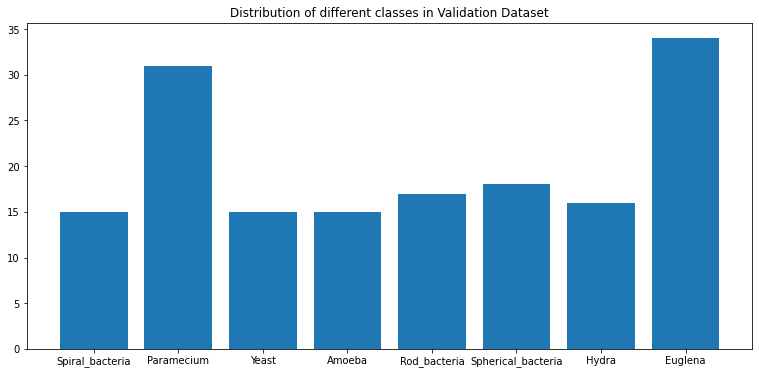

In [ ]:
#Validation Data
image_folder = ['Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/bacteria-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(13, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['Spiral_bacteria', 'Paramecium', 'Yeast', 'Amoeba', 'Rod_bacteria', 'Spherical_bacteria', 'Hydra', 'Euglena']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/bacteria-data/validation/'+i+'/'))))

Valid Spiral_bacteria images are: 15
Valid Paramecium images are: 31
Valid Yeast images are: 15
Valid Amoeba images are: 15
Valid Rod_bacteria images are: 17
Valid Spherical_bacteria images are: 18
Valid Hydra images are: 16
Valid Euglena images are: 34


# Deep Learning with Data Augumentation

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=256; img_height=256
batch_size=16

In [ ]:
TRAINING_DIR = '/content/bacteria-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 628 images belonging to 8 classes.


In [ ]:
VALIDATION_DIR = '/content/bacteria-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )
     

Found 161 images belonging to 8 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
# Creating Model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')
])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
# Model compile
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=200,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )
     

Epoch 1/200
40/40 [==============================] - ETA: 0s - loss: 1.1496 - accuracy: 0.5557

40/40 [==============================] - 15s 381ms/step - loss: 1.1496 - accuracy: 0.5557 - val_loss: 2.4746 - val_accuracy: 0.3416
Epoch 2/200
40/40 [==============================] - ETA: 0s - loss: 1.1414 - accuracy: 0.5669

40/40 [==============================] - 15s 381ms/step - loss: 1.1414 - accuracy: 0.5669 - val_loss: 2.3157 - val_accuracy: 0.3727
Epoch 3/200
40/40 [==============================] - ETA: 0s - loss: 1.1158 - accuracy: 0.5589

40/40 [==============================] - 15s 379ms/step - loss: 1.1158 - accuracy: 0.5589 - val_loss: 2.1267 - val_accuracy: 0.3540
Epoch 4/200
40/40 [==============================] - ETA: 0s - loss: 1.1443 - accuracy: 0.5780

40/40 [==============================] - 15s 379ms/step - loss: 1.1443 - accuracy: 0.5780 - val_loss: 2.1953 - val_accuracy: 0.3478
Epoch 5/200
40/40 [==============================] - ETA: 0s - loss: 1.1315 - accuracy: 0.5653

40/40 [==============================] - 15s 378ms/step - loss: 1.1315 - accuracy: 0.5653 - val_loss: 2.2632 - val_accuracy: 0.4037
Epoch 6/200
40/40 [==============================] - ETA: 0s - loss: 1.1365 - accuracy: 0.5876

40/40 [==============================] - 15s 378ms/step - loss: 1.1365 - accuracy: 0.5876 - val_loss: 2.2671 - val_accuracy: 0.3913
Epoch 7/200
40/40 [==============================] - ETA: 0s - loss: 1.1685 - accuracy: 0.5748

40/40 [==============================] - 15s 377ms/step - loss: 1.1685 - accuracy: 0.5748 - val_loss: 2.1964 - val_accuracy: 0.3106
Epoch 8/200
40/40 [==============================] - ETA: 0s - loss: 1.1397 - accuracy: 0.5717

40/40 [==============================] - 15s 381ms/step - loss: 1.1397 - accuracy: 0.5717 - val_loss: 2.2993 - val_accuracy: 0.3416
Epoch 9/200
40/40 [==============================] - ETA: 0s - loss: 1.0671 - accuracy: 0.5828

40/40 [==============================] - 15s 384ms/step - loss: 1.0671 - accuracy: 0.5828 - val_loss: 2.2737 - val_accuracy: 0.3789
Epoch 10/200
40/40 [==============================] - ETA: 0s - loss: 1.0508 - accuracy: 0.6003

40/40 [==============================] - 15s 381ms/step - loss: 1.0508 - accuracy: 0.6003 - val_loss: 2.3039 - val_accuracy: 0.3602
Epoch 11/200
40/40 [==============================] - ETA: 0s - loss: 1.0721 - accuracy: 0.6146

40/40 [==============================] - 15s 381ms/step - loss: 1.0721 - accuracy: 0.6146 - val_loss: 2.1806 - val_accuracy: 0.3602
Epoch 12/200
40/40 [==============================] - ETA: 0s - loss: 1.0018 - accuracy: 0.6290

40/40 [==============================] - 15s 381ms/step - loss: 1.0018 - accuracy: 0.6290 - val_loss: 2.3449 - val_accuracy: 0.3851
Epoch 13/200
40/40 [==============================] - ETA: 0s - loss: 1.0034 - accuracy: 0.6210

40/40 [==============================] - 15s 386ms/step - loss: 1.0034 - accuracy: 0.6210 - val_loss: 2.6199 - val_accuracy: 0.3354
Epoch 14/200
40/40 [==============================] - ETA: 0s - loss: 1.0027 - accuracy: 0.6417

40/40 [==============================] - 16s 408ms/step - loss: 1.0027 - accuracy: 0.6417 - val_loss: 2.2956 - val_accuracy: 0.3602
Epoch 15/200
40/40 [==============================] - ETA: 0s - loss: 1.0082 - accuracy: 0.6194

40/40 [==============================] - 15s 381ms/step - loss: 1.0082 - accuracy: 0.6194 - val_loss: 2.5029 - val_accuracy: 0.3416
Epoch 16/200
40/40 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.6338

40/40 [==============================] - 15s 381ms/step - loss: 0.9559 - accuracy: 0.6338 - val_loss: 2.7247 - val_accuracy: 0.3727
Epoch 17/200
40/40 [==============================] - ETA: 0s - loss: 1.0115 - accuracy: 0.6146

40/40 [==============================] - 15s 385ms/step - loss: 1.0115 - accuracy: 0.6146 - val_loss: 2.3925 - val_accuracy: 0.3416
Epoch 18/200
40/40 [==============================] - ETA: 0s - loss: 0.9834 - accuracy: 0.6226

40/40 [==============================] - 15s 377ms/step - loss: 0.9834 - accuracy: 0.6226 - val_loss: 2.7390 - val_accuracy: 0.3106
Epoch 19/200
40/40 [==============================] - ETA: 0s - loss: 1.0765 - accuracy: 0.6401

40/40 [==============================] - 15s 385ms/step - loss: 1.0765 - accuracy: 0.6401 - val_loss: 2.6567 - val_accuracy: 0.3230
Epoch 20/200
40/40 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.5844

40/40 [==============================] - 15s 384ms/step - loss: 1.1069 - accuracy: 0.5844 - val_loss: 2.4806 - val_accuracy: 0.3727
Epoch 21/200
40/40 [==============================] - ETA: 0s - loss: 0.9260 - accuracy: 0.6481

40/40 [==============================] - 15s 381ms/step - loss: 0.9260 - accuracy: 0.6481 - val_loss: 2.5109 - val_accuracy: 0.3540
Epoch 22/200
40/40 [==============================] - ETA: 0s - loss: 0.9533 - accuracy: 0.6624

40/40 [==============================] - 15s 376ms/step - loss: 0.9533 - accuracy: 0.6624 - val_loss: 2.4724 - val_accuracy: 0.3665
Epoch 23/200
40/40 [==============================] - ETA: 0s - loss: 0.9427 - accuracy: 0.6576

40/40 [==============================] - 15s 378ms/step - loss: 0.9427 - accuracy: 0.6576 - val_loss: 2.6347 - val_accuracy: 0.2733
Epoch 24/200
40/40 [==============================] - ETA: 0s - loss: 0.9494 - accuracy: 0.6656

40/40 [==============================] - 15s 380ms/step - loss: 0.9494 - accuracy: 0.6656 - val_loss: 2.7971 - val_accuracy: 0.3727
Epoch 25/200
40/40 [==============================] - ETA: 0s - loss: 0.9410 - accuracy: 0.6465

40/40 [==============================] - 15s 377ms/step - loss: 0.9410 - accuracy: 0.6465 - val_loss: 2.2968 - val_accuracy: 0.3354
Epoch 26/200
40/40 [==============================] - ETA: 0s - loss: 0.9159 - accuracy: 0.6672

40/40 [==============================] - 15s 376ms/step - loss: 0.9159 - accuracy: 0.6672 - val_loss: 2.8015 - val_accuracy: 0.3416
Epoch 27/200
40/40 [==============================] - ETA: 0s - loss: 0.9896 - accuracy: 0.6322

40/40 [==============================] - 15s 376ms/step - loss: 0.9896 - accuracy: 0.6322 - val_loss: 2.6697 - val_accuracy: 0.3354
Epoch 28/200
40/40 [==============================] - ETA: 0s - loss: 0.9126 - accuracy: 0.6672

40/40 [==============================] - 15s 383ms/step - loss: 0.9126 - accuracy: 0.6672 - val_loss: 2.7222 - val_accuracy: 0.3975
Epoch 29/200
40/40 [==============================] - ETA: 0s - loss: 0.9171 - accuracy: 0.6943

40/40 [==============================] - 15s 380ms/step - loss: 0.9171 - accuracy: 0.6943 - val_loss: 2.5378 - val_accuracy: 0.3975
Epoch 30/200
40/40 [==============================] - ETA: 0s - loss: 0.9582 - accuracy: 0.6401

40/40 [==============================] - 15s 381ms/step - loss: 0.9582 - accuracy: 0.6401 - val_loss: 2.4696 - val_accuracy: 0.3789
Epoch 31/200
40/40 [==============================] - ETA: 0s - loss: 1.0194 - accuracy: 0.6290

40/40 [==============================] - 15s 382ms/step - loss: 1.0194 - accuracy: 0.6290 - val_loss: 2.3816 - val_accuracy: 0.3789
Epoch 32/200
40/40 [==============================] - ETA: 0s - loss: 0.9318 - accuracy: 0.6513

40/40 [==============================] - 16s 405ms/step - loss: 0.9318 - accuracy: 0.6513 - val_loss: 2.2884 - val_accuracy: 0.3602
Epoch 33/200
40/40 [==============================] - ETA: 0s - loss: 0.8533 - accuracy: 0.6863

40/40 [==============================] - 15s 380ms/step - loss: 0.8533 - accuracy: 0.6863 - val_loss: 2.5231 - val_accuracy: 0.3789
Epoch 34/200
40/40 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.6592

40/40 [==============================] - 15s 377ms/step - loss: 0.8297 - accuracy: 0.6592 - val_loss: 2.6033 - val_accuracy: 0.3789
Epoch 35/200
40/40 [==============================] - ETA: 0s - loss: 0.8933 - accuracy: 0.6799

40/40 [==============================] - 15s 379ms/step - loss: 0.8933 - accuracy: 0.6799 - val_loss: 2.8040 - val_accuracy: 0.3416
Epoch 36/200
40/40 [==============================] - ETA: 0s - loss: 0.8492 - accuracy: 0.6943

40/40 [==============================] - 15s 388ms/step - loss: 0.8492 - accuracy: 0.6943 - val_loss: 2.4800 - val_accuracy: 0.3602
Epoch 37/200
40/40 [==============================] - ETA: 0s - loss: 0.8237 - accuracy: 0.6959

40/40 [==============================] - 15s 382ms/step - loss: 0.8237 - accuracy: 0.6959 - val_loss: 2.5455 - val_accuracy: 0.3416
Epoch 38/200
40/40 [==============================] - ETA: 0s - loss: 0.9219 - accuracy: 0.6608

40/40 [==============================] - 15s 388ms/step - loss: 0.9219 - accuracy: 0.6608 - val_loss: 2.5059 - val_accuracy: 0.3665
Epoch 39/200
40/40 [==============================] - ETA: 0s - loss: 0.8214 - accuracy: 0.7070

40/40 [==============================] - 15s 383ms/step - loss: 0.8214 - accuracy: 0.7070 - val_loss: 2.5451 - val_accuracy: 0.3665
Epoch 40/200
40/40 [==============================] - ETA: 0s - loss: 0.9259 - accuracy: 0.6513

40/40 [==============================] - 15s 384ms/step - loss: 0.9259 - accuracy: 0.6513 - val_loss: 2.5047 - val_accuracy: 0.3789
Epoch 41/200
40/40 [==============================] - ETA: 0s - loss: 0.8891 - accuracy: 0.6656

40/40 [==============================] - 15s 381ms/step - loss: 0.8891 - accuracy: 0.6656 - val_loss: 3.0115 - val_accuracy: 0.3168
Epoch 42/200
40/40 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.6990

40/40 [==============================] - 15s 378ms/step - loss: 0.8097 - accuracy: 0.6990 - val_loss: 2.5973 - val_accuracy: 0.3913
Epoch 43/200
40/40 [==============================] - ETA: 0s - loss: 0.7749 - accuracy: 0.7389

40/40 [==============================] - 15s 384ms/step - loss: 0.7749 - accuracy: 0.7389 - val_loss: 2.9148 - val_accuracy: 0.3727
Epoch 44/200
40/40 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.7118

40/40 [==============================] - 15s 386ms/step - loss: 0.7867 - accuracy: 0.7118 - val_loss: 2.8612 - val_accuracy: 0.3975
Epoch 45/200
40/40 [==============================] - ETA: 0s - loss: 0.9340 - accuracy: 0.6513

40/40 [==============================] - 15s 394ms/step - loss: 0.9340 - accuracy: 0.6513 - val_loss: 2.4672 - val_accuracy: 0.3665
Epoch 46/200
40/40 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.7070

40/40 [==============================] - 15s 379ms/step - loss: 0.8568 - accuracy: 0.7070 - val_loss: 2.7257 - val_accuracy: 0.3727
Epoch 47/200
40/40 [==============================] - ETA: 0s - loss: 0.8095 - accuracy: 0.6895

40/40 [==============================] - 15s 380ms/step - loss: 0.8095 - accuracy: 0.6895 - val_loss: 2.8012 - val_accuracy: 0.4037
Epoch 48/200
40/40 [==============================] - ETA: 0s - loss: 0.7605 - accuracy: 0.7213

40/40 [==============================] - 15s 383ms/step - loss: 0.7605 - accuracy: 0.7213 - val_loss: 3.0790 - val_accuracy: 0.2981
Epoch 49/200
40/40 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.6768

40/40 [==============================] - 15s 384ms/step - loss: 0.8640 - accuracy: 0.6768 - val_loss: 2.5375 - val_accuracy: 0.3727
Epoch 50/200
40/40 [==============================] - ETA: 0s - loss: 0.7612 - accuracy: 0.7102

40/40 [==============================] - 15s 387ms/step - loss: 0.7612 - accuracy: 0.7102 - val_loss: 3.2766 - val_accuracy: 0.3478
Epoch 51/200
40/40 [==============================] - ETA: 0s - loss: 0.8392 - accuracy: 0.6911

40/40 [==============================] - 17s 415ms/step - loss: 0.8392 - accuracy: 0.6911 - val_loss: 2.4949 - val_accuracy: 0.3975
Epoch 52/200
40/40 [==============================] - ETA: 0s - loss: 0.7864 - accuracy: 0.7341

40/40 [==============================] - 16s 391ms/step - loss: 0.7864 - accuracy: 0.7341 - val_loss: 2.6655 - val_accuracy: 0.3913
Epoch 53/200
40/40 [==============================] - ETA: 0s - loss: 0.7319 - accuracy: 0.7500

40/40 [==============================] - 15s 387ms/step - loss: 0.7319 - accuracy: 0.7500 - val_loss: 2.6214 - val_accuracy: 0.3975
Epoch 54/200
40/40 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.7389

40/40 [==============================] - 15s 385ms/step - loss: 0.7271 - accuracy: 0.7389 - val_loss: 2.9686 - val_accuracy: 0.4037
Epoch 55/200
40/40 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.7373

40/40 [==============================] - 16s 392ms/step - loss: 0.7932 - accuracy: 0.7373 - val_loss: 2.5625 - val_accuracy: 0.4099
Epoch 56/200
40/40 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.7229

40/40 [==============================] - 15s 384ms/step - loss: 0.8013 - accuracy: 0.7229 - val_loss: 2.6244 - val_accuracy: 0.3665
Epoch 57/200
40/40 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.7500

40/40 [==============================] - 15s 382ms/step - loss: 0.6908 - accuracy: 0.7500 - val_loss: 2.5649 - val_accuracy: 0.4286
Epoch 58/200
40/40 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.7420

40/40 [==============================] - 15s 375ms/step - loss: 0.7652 - accuracy: 0.7420 - val_loss: 2.6288 - val_accuracy: 0.4161
Epoch 59/200
40/40 [==============================] - ETA: 0s - loss: 0.6304 - accuracy: 0.7596

40/40 [==============================] - 15s 379ms/step - loss: 0.6304 - accuracy: 0.7596 - val_loss: 2.8075 - val_accuracy: 0.4286
Epoch 60/200
40/40 [==============================] - ETA: 0s - loss: 0.6983 - accuracy: 0.7325

40/40 [==============================] - 15s 379ms/step - loss: 0.6983 - accuracy: 0.7325 - val_loss: 2.8198 - val_accuracy: 0.3913
Epoch 61/200
40/40 [==============================] - ETA: 0s - loss: 0.6525 - accuracy: 0.7834

40/40 [==============================] - 15s 379ms/step - loss: 0.6525 - accuracy: 0.7834 - val_loss: 3.3775 - val_accuracy: 0.3665
Epoch 62/200
40/40 [==============================] - ETA: 0s - loss: 0.7644 - accuracy: 0.7277

40/40 [==============================] - 15s 370ms/step - loss: 0.7644 - accuracy: 0.7277 - val_loss: 2.9174 - val_accuracy: 0.3851
Epoch 63/200
40/40 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.7452

40/40 [==============================] - 15s 377ms/step - loss: 0.6906 - accuracy: 0.7452 - val_loss: 2.7058 - val_accuracy: 0.3913
Epoch 64/200
40/40 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.7659

40/40 [==============================] - 15s 378ms/step - loss: 0.7164 - accuracy: 0.7659 - val_loss: 3.0539 - val_accuracy: 0.3540
Epoch 65/200
40/40 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.7548

40/40 [==============================] - 16s 393ms/step - loss: 0.6877 - accuracy: 0.7548 - val_loss: 2.8510 - val_accuracy: 0.3913
Epoch 66/200
40/40 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.7436

40/40 [==============================] - 15s 385ms/step - loss: 0.6807 - accuracy: 0.7436 - val_loss: 2.9822 - val_accuracy: 0.3540
Epoch 67/200
40/40 [==============================] - ETA: 0s - loss: 0.7276 - accuracy: 0.7166

40/40 [==============================] - 16s 409ms/step - loss: 0.7276 - accuracy: 0.7166 - val_loss: 3.0695 - val_accuracy: 0.3851
Epoch 68/200
40/40 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.7898

40/40 [==============================] - 15s 378ms/step - loss: 0.6262 - accuracy: 0.7898 - val_loss: 3.3945 - val_accuracy: 0.3478
Epoch 69/200
40/40 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.7564

40/40 [==============================] - 16s 412ms/step - loss: 0.6819 - accuracy: 0.7564 - val_loss: 2.9523 - val_accuracy: 0.3975
Epoch 70/200
40/40 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.7420

40/40 [==============================] - 15s 379ms/step - loss: 0.6956 - accuracy: 0.7420 - val_loss: 2.7401 - val_accuracy: 0.3665
Epoch 71/200
40/40 [==============================] - ETA: 0s - loss: 0.6070 - accuracy: 0.7994

40/40 [==============================] - 16s 391ms/step - loss: 0.6070 - accuracy: 0.7994 - val_loss: 3.1154 - val_accuracy: 0.3478
Epoch 72/200
40/40 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.7627

40/40 [==============================] - 15s 379ms/step - loss: 0.6580 - accuracy: 0.7627 - val_loss: 2.9411 - val_accuracy: 0.3789
Epoch 73/200
40/40 [==============================] - ETA: 0s - loss: 0.7732 - accuracy: 0.7420

40/40 [==============================] - 16s 397ms/step - loss: 0.7732 - accuracy: 0.7420 - val_loss: 2.4915 - val_accuracy: 0.3354
Epoch 74/200
40/40 [==============================] - ETA: 0s - loss: 0.7298 - accuracy: 0.7245

40/40 [==============================] - 15s 379ms/step - loss: 0.7298 - accuracy: 0.7245 - val_loss: 2.7705 - val_accuracy: 0.4099
Epoch 75/200
40/40 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.7866

40/40 [==============================] - 15s 388ms/step - loss: 0.6243 - accuracy: 0.7866 - val_loss: 2.8416 - val_accuracy: 0.3665
Epoch 76/200
40/40 [==============================] - ETA: 0s - loss: 0.6151 - accuracy: 0.7691

40/40 [==============================] - 15s 377ms/step - loss: 0.6151 - accuracy: 0.7691 - val_loss: 2.9981 - val_accuracy: 0.3975
Epoch 77/200
40/40 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.7532

40/40 [==============================] - 15s 380ms/step - loss: 0.6924 - accuracy: 0.7532 - val_loss: 2.9927 - val_accuracy: 0.3913
Epoch 78/200
40/40 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.7596

40/40 [==============================] - 15s 377ms/step - loss: 0.6539 - accuracy: 0.7596 - val_loss: 2.6448 - val_accuracy: 0.3975
Epoch 79/200
40/40 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.7962

40/40 [==============================] - 15s 378ms/step - loss: 0.5775 - accuracy: 0.7962 - val_loss: 2.9503 - val_accuracy: 0.3478
Epoch 80/200
40/40 [==============================] - ETA: 0s - loss: 0.5742 - accuracy: 0.8041

40/40 [==============================] - 15s 380ms/step - loss: 0.5742 - accuracy: 0.8041 - val_loss: 3.0614 - val_accuracy: 0.4037
Epoch 81/200
40/40 [==============================] - ETA: 0s - loss: 0.5701 - accuracy: 0.7882

40/40 [==============================] - 15s 381ms/step - loss: 0.5701 - accuracy: 0.7882 - val_loss: 3.1374 - val_accuracy: 0.3540
Epoch 82/200
40/40 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.7755

40/40 [==============================] - 15s 384ms/step - loss: 0.6125 - accuracy: 0.7755 - val_loss: 2.9946 - val_accuracy: 0.3851
Epoch 83/200
40/40 [==============================] - ETA: 0s - loss: 0.7552 - accuracy: 0.7293

40/40 [==============================] - 15s 380ms/step - loss: 0.7552 - accuracy: 0.7293 - val_loss: 2.9645 - val_accuracy: 0.3851
Epoch 84/200
40/40 [==============================] - ETA: 0s - loss: 0.6236 - accuracy: 0.7739

40/40 [==============================] - 15s 381ms/step - loss: 0.6236 - accuracy: 0.7739 - val_loss: 2.8597 - val_accuracy: 0.3478
Epoch 85/200
40/40 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8217

40/40 [==============================] - 15s 380ms/step - loss: 0.4745 - accuracy: 0.8217 - val_loss: 3.1592 - val_accuracy: 0.3665
Epoch 86/200
40/40 [==============================] - ETA: 0s - loss: 0.5295 - accuracy: 0.7994

40/40 [==============================] - 16s 394ms/step - loss: 0.5295 - accuracy: 0.7994 - val_loss: 3.0386 - val_accuracy: 0.3975
Epoch 87/200
40/40 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.7882

40/40 [==============================] - 16s 405ms/step - loss: 0.5690 - accuracy: 0.7882 - val_loss: 3.4345 - val_accuracy: 0.3540
Epoch 88/200
40/40 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.7818

40/40 [==============================] - 15s 373ms/step - loss: 0.5996 - accuracy: 0.7818 - val_loss: 2.9046 - val_accuracy: 0.4037
Epoch 89/200
40/40 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.7866

40/40 [==============================] - 15s 380ms/step - loss: 0.5720 - accuracy: 0.7866 - val_loss: 3.1076 - val_accuracy: 0.3478
Epoch 90/200
40/40 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.7914

40/40 [==============================] - 15s 382ms/step - loss: 0.5913 - accuracy: 0.7914 - val_loss: 2.9306 - val_accuracy: 0.3727
Epoch 91/200
40/40 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.7627

40/40 [==============================] - 15s 379ms/step - loss: 0.6867 - accuracy: 0.7627 - val_loss: 2.9953 - val_accuracy: 0.3851
Epoch 92/200
40/40 [==============================] - ETA: 0s - loss: 0.5957 - accuracy: 0.7914

40/40 [==============================] - 15s 379ms/step - loss: 0.5957 - accuracy: 0.7914 - val_loss: 3.1543 - val_accuracy: 0.3975
Epoch 93/200
40/40 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.7930

40/40 [==============================] - 15s 377ms/step - loss: 0.5092 - accuracy: 0.7930 - val_loss: 3.5248 - val_accuracy: 0.3106
Epoch 94/200
40/40 [==============================] - ETA: 0s - loss: 0.7285 - accuracy: 0.7580

40/40 [==============================] - 15s 381ms/step - loss: 0.7285 - accuracy: 0.7580 - val_loss: 2.9656 - val_accuracy: 0.3354
Epoch 95/200
40/40 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.7866

40/40 [==============================] - 15s 375ms/step - loss: 0.6030 - accuracy: 0.7866 - val_loss: 3.2146 - val_accuracy: 0.4037
Epoch 96/200
40/40 [==============================] - ETA: 0s - loss: 0.5892 - accuracy: 0.8073

40/40 [==============================] - 15s 380ms/step - loss: 0.5892 - accuracy: 0.8073 - val_loss: 2.9563 - val_accuracy: 0.3230
Epoch 97/200
40/40 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.7707

40/40 [==============================] - 15s 383ms/step - loss: 0.6750 - accuracy: 0.7707 - val_loss: 2.9579 - val_accuracy: 0.3727
Epoch 98/200
40/40 [==============================] - ETA: 0s - loss: 0.5739 - accuracy: 0.7946

40/40 [==============================] - 15s 380ms/step - loss: 0.5739 - accuracy: 0.7946 - val_loss: 3.1731 - val_accuracy: 0.3540
Epoch 99/200
40/40 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8280

40/40 [==============================] - 15s 382ms/step - loss: 0.4853 - accuracy: 0.8280 - val_loss: 3.0100 - val_accuracy: 0.3851
Epoch 100/200
40/40 [==============================] - ETA: 0s - loss: 0.5031 - accuracy: 0.8041

40/40 [==============================] - 15s 383ms/step - loss: 0.5031 - accuracy: 0.8041 - val_loss: 3.0370 - val_accuracy: 0.3727
Epoch 101/200
40/40 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.7930

40/40 [==============================] - 15s 382ms/step - loss: 0.5801 - accuracy: 0.7930 - val_loss: 3.1585 - val_accuracy: 0.3354
Epoch 102/200
40/40 [==============================] - ETA: 0s - loss: 0.4883 - accuracy: 0.8296

40/40 [==============================] - 16s 397ms/step - loss: 0.4883 - accuracy: 0.8296 - val_loss: 3.6706 - val_accuracy: 0.3416
Epoch 103/200
40/40 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7962

40/40 [==============================] - 15s 381ms/step - loss: 0.5664 - accuracy: 0.7962 - val_loss: 3.4202 - val_accuracy: 0.3913
Epoch 104/200
40/40 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.8041

40/40 [==============================] - 16s 404ms/step - loss: 0.5593 - accuracy: 0.8041 - val_loss: 2.8318 - val_accuracy: 0.3665
Epoch 105/200
40/40 [==============================] - ETA: 0s - loss: 0.6459 - accuracy: 0.7787

40/40 [==============================] - 15s 377ms/step - loss: 0.6459 - accuracy: 0.7787 - val_loss: 3.1194 - val_accuracy: 0.3727
Epoch 106/200
40/40 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.7787

40/40 [==============================] - 15s 383ms/step - loss: 0.7003 - accuracy: 0.7787 - val_loss: 2.6711 - val_accuracy: 0.3665
Epoch 107/200
40/40 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.7548

40/40 [==============================] - 15s 383ms/step - loss: 0.6871 - accuracy: 0.7548 - val_loss: 2.9836 - val_accuracy: 0.3478
Epoch 108/200
40/40 [==============================] - ETA: 0s - loss: 0.5506 - accuracy: 0.8232

40/40 [==============================] - 15s 377ms/step - loss: 0.5506 - accuracy: 0.8232 - val_loss: 3.2264 - val_accuracy: 0.3851
Epoch 109/200
40/40 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8280

40/40 [==============================] - 15s 385ms/step - loss: 0.4789 - accuracy: 0.8280 - val_loss: 3.0711 - val_accuracy: 0.3665
Epoch 110/200
40/40 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.8392

40/40 [==============================] - 15s 381ms/step - loss: 0.4544 - accuracy: 0.8392 - val_loss: 3.0784 - val_accuracy: 0.3665
Epoch 111/200
40/40 [==============================] - ETA: 0s - loss: 0.5786 - accuracy: 0.8057

40/40 [==============================] - 15s 374ms/step - loss: 0.5786 - accuracy: 0.8057 - val_loss: 2.9249 - val_accuracy: 0.3913
Epoch 112/200
40/40 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.8089

40/40 [==============================] - 15s 376ms/step - loss: 0.5382 - accuracy: 0.8089 - val_loss: 3.1893 - val_accuracy: 0.4037
Epoch 113/200
40/40 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.8248

40/40 [==============================] - 15s 377ms/step - loss: 0.5071 - accuracy: 0.8248 - val_loss: 3.1424 - val_accuracy: 0.3975
Epoch 114/200
40/40 [==============================] - ETA: 0s - loss: 0.4517 - accuracy: 0.8392

40/40 [==============================] - 15s 375ms/step - loss: 0.4517 - accuracy: 0.8392 - val_loss: 3.3605 - val_accuracy: 0.3913
Epoch 115/200
40/40 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8439

40/40 [==============================] - 15s 379ms/step - loss: 0.4466 - accuracy: 0.8439 - val_loss: 3.3477 - val_accuracy: 0.3789
Epoch 116/200
40/40 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.8360

40/40 [==============================] - 15s 381ms/step - loss: 0.4360 - accuracy: 0.8360 - val_loss: 3.5695 - val_accuracy: 0.3478
Epoch 117/200
40/40 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8328

40/40 [==============================] - 15s 383ms/step - loss: 0.4393 - accuracy: 0.8328 - val_loss: 3.3381 - val_accuracy: 0.3665
Epoch 118/200
40/40 [==============================] - ETA: 0s - loss: 0.5311 - accuracy: 0.8073

40/40 [==============================] - 15s 382ms/step - loss: 0.5311 - accuracy: 0.8073 - val_loss: 3.2579 - val_accuracy: 0.3851
Epoch 119/200
40/40 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.8328

40/40 [==============================] - 15s 382ms/step - loss: 0.4499 - accuracy: 0.8328 - val_loss: 3.2771 - val_accuracy: 0.3416
Epoch 120/200
40/40 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.8503

40/40 [==============================] - 15s 381ms/step - loss: 0.4569 - accuracy: 0.8503 - val_loss: 3.4762 - val_accuracy: 0.3975
Epoch 121/200
40/40 [==============================] - ETA: 0s - loss: 0.4396 - accuracy: 0.8503

40/40 [==============================] - 15s 385ms/step - loss: 0.4396 - accuracy: 0.8503 - val_loss: 3.3860 - val_accuracy: 0.3975
Epoch 122/200
40/40 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.8328

40/40 [==============================] - 16s 398ms/step - loss: 0.4689 - accuracy: 0.8328 - val_loss: 3.3927 - val_accuracy: 0.3727
Epoch 123/200
40/40 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.8408

40/40 [==============================] - 15s 376ms/step - loss: 0.4424 - accuracy: 0.8408 - val_loss: 3.1019 - val_accuracy: 0.3851
Epoch 124/200
40/40 [==============================] - ETA: 0s - loss: 0.5139 - accuracy: 0.8057

40/40 [==============================] - 15s 378ms/step - loss: 0.5139 - accuracy: 0.8057 - val_loss: 2.9452 - val_accuracy: 0.3665
Epoch 125/200
40/40 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.8312

40/40 [==============================] - 15s 384ms/step - loss: 0.4526 - accuracy: 0.8312 - val_loss: 3.4270 - val_accuracy: 0.3665
Epoch 126/200
40/40 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.8392

40/40 [==============================] - 15s 383ms/step - loss: 0.4348 - accuracy: 0.8392 - val_loss: 3.6326 - val_accuracy: 0.4099
Epoch 127/200
40/40 [==============================] - ETA: 0s - loss: 0.4713 - accuracy: 0.8376

40/40 [==============================] - 15s 383ms/step - loss: 0.4713 - accuracy: 0.8376 - val_loss: 3.5439 - val_accuracy: 0.3727
Epoch 128/200
40/40 [==============================] - ETA: 0s - loss: 0.4281 - accuracy: 0.8567

40/40 [==============================] - 15s 385ms/step - loss: 0.4281 - accuracy: 0.8567 - val_loss: 3.2408 - val_accuracy: 0.3975
Epoch 129/200
40/40 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.8503

40/40 [==============================] - 15s 384ms/step - loss: 0.4576 - accuracy: 0.8503 - val_loss: 3.3645 - val_accuracy: 0.3913
Epoch 130/200
40/40 [==============================] - ETA: 0s - loss: 0.4204 - accuracy: 0.8646

40/40 [==============================] - 15s 383ms/step - loss: 0.4204 - accuracy: 0.8646 - val_loss: 3.6511 - val_accuracy: 0.3975
Epoch 131/200
40/40 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.8312

40/40 [==============================] - 15s 378ms/step - loss: 0.4708 - accuracy: 0.8312 - val_loss: 3.5809 - val_accuracy: 0.3913
Epoch 132/200
40/40 [==============================] - ETA: 0s - loss: 0.4325 - accuracy: 0.8551

40/40 [==============================] - 15s 381ms/step - loss: 0.4325 - accuracy: 0.8551 - val_loss: 3.7110 - val_accuracy: 0.3665
Epoch 133/200
40/40 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8838

40/40 [==============================] - 15s 382ms/step - loss: 0.3335 - accuracy: 0.8838 - val_loss: 3.8066 - val_accuracy: 0.3789
Epoch 134/200
40/40 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.8439

40/40 [==============================] - 15s 378ms/step - loss: 0.4740 - accuracy: 0.8439 - val_loss: 3.7821 - val_accuracy: 0.3478
Epoch 135/200
40/40 [==============================] - ETA: 0s - loss: 0.4054 - accuracy: 0.8694

40/40 [==============================] - 15s 378ms/step - loss: 0.4054 - accuracy: 0.8694 - val_loss: 3.6403 - val_accuracy: 0.3354
Epoch 136/200
40/40 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8519

40/40 [==============================] - 15s 380ms/step - loss: 0.3948 - accuracy: 0.8519 - val_loss: 3.4711 - val_accuracy: 0.3851
Epoch 137/200
40/40 [==============================] - ETA: 0s - loss: 0.7681 - accuracy: 0.7468

40/40 [==============================] - 15s 381ms/step - loss: 0.7681 - accuracy: 0.7468 - val_loss: 2.8840 - val_accuracy: 0.3106
Epoch 138/200
40/40 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8599

40/40 [==============================] - 15s 384ms/step - loss: 0.4494 - accuracy: 0.8599 - val_loss: 3.0893 - val_accuracy: 0.3789
Epoch 139/200
40/40 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8646

40/40 [==============================] - 16s 402ms/step - loss: 0.3465 - accuracy: 0.8646 - val_loss: 3.6610 - val_accuracy: 0.3665
Epoch 140/200
40/40 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.8487

40/40 [==============================] - 15s 381ms/step - loss: 0.4565 - accuracy: 0.8487 - val_loss: 3.4033 - val_accuracy: 0.3540
Epoch 141/200
40/40 [==============================] - ETA: 0s - loss: 0.3992 - accuracy: 0.8615

40/40 [==============================] - 15s 386ms/step - loss: 0.3992 - accuracy: 0.8615 - val_loss: 3.3539 - val_accuracy: 0.4037
Epoch 142/200
40/40 [==============================] - ETA: 0s - loss: 0.3320 - accuracy: 0.8933

40/40 [==============================] - 15s 386ms/step - loss: 0.3320 - accuracy: 0.8933 - val_loss: 3.6671 - val_accuracy: 0.3789
Epoch 143/200
40/40 [==============================] - ETA: 0s - loss: 0.4412 - accuracy: 0.8408

40/40 [==============================] - 16s 391ms/step - loss: 0.4412 - accuracy: 0.8408 - val_loss: 3.5454 - val_accuracy: 0.3416
Epoch 144/200
40/40 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.8376

40/40 [==============================] - 15s 387ms/step - loss: 0.4810 - accuracy: 0.8376 - val_loss: 3.4449 - val_accuracy: 0.3602
Epoch 145/200
40/40 [==============================] - ETA: 0s - loss: 0.4299 - accuracy: 0.8344

40/40 [==============================] - 15s 387ms/step - loss: 0.4299 - accuracy: 0.8344 - val_loss: 3.3653 - val_accuracy: 0.3540
Epoch 146/200
40/40 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.8439

40/40 [==============================] - 15s 387ms/step - loss: 0.4475 - accuracy: 0.8439 - val_loss: 3.6162 - val_accuracy: 0.3416
Epoch 147/200
40/40 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8583

40/40 [==============================] - 15s 383ms/step - loss: 0.4395 - accuracy: 0.8583 - val_loss: 3.3266 - val_accuracy: 0.3789
Epoch 148/200
40/40 [==============================] - ETA: 0s - loss: 0.5047 - accuracy: 0.8248

40/40 [==============================] - 15s 382ms/step - loss: 0.5047 - accuracy: 0.8248 - val_loss: 3.2133 - val_accuracy: 0.3665
Epoch 149/200
40/40 [==============================] - ETA: 0s - loss: 0.3881 - accuracy: 0.8774

40/40 [==============================] - 15s 375ms/step - loss: 0.3881 - accuracy: 0.8774 - val_loss: 3.3697 - val_accuracy: 0.3540
Epoch 150/200
40/40 [==============================] - ETA: 0s - loss: 0.2937 - accuracy: 0.9140

40/40 [==============================] - 15s 384ms/step - loss: 0.2937 - accuracy: 0.9140 - val_loss: 3.7888 - val_accuracy: 0.3602
Epoch 151/200
40/40 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.9029

40/40 [==============================] - 15s 383ms/step - loss: 0.3384 - accuracy: 0.9029 - val_loss: 3.6555 - val_accuracy: 0.3665
Epoch 152/200
40/40 [==============================] - ETA: 0s - loss: 0.3910 - accuracy: 0.8424

40/40 [==============================] - 15s 384ms/step - loss: 0.3910 - accuracy: 0.8424 - val_loss: 3.4830 - val_accuracy: 0.3354
Epoch 153/200
40/40 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8742

40/40 [==============================] - 15s 384ms/step - loss: 0.3891 - accuracy: 0.8742 - val_loss: 4.0076 - val_accuracy: 0.3602
Epoch 154/200
40/40 [==============================] - ETA: 0s - loss: 0.3904 - accuracy: 0.8615

40/40 [==============================] - 15s 383ms/step - loss: 0.3904 - accuracy: 0.8615 - val_loss: 3.9204 - val_accuracy: 0.3540
Epoch 155/200
40/40 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.8583

40/40 [==============================] - 15s 381ms/step - loss: 0.4168 - accuracy: 0.8583 - val_loss: 4.0167 - val_accuracy: 0.3727
Epoch 156/200
40/40 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8758

40/40 [==============================] - 16s 402ms/step - loss: 0.3405 - accuracy: 0.8758 - val_loss: 3.8137 - val_accuracy: 0.4037
Epoch 157/200
40/40 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8519

40/40 [==============================] - 15s 379ms/step - loss: 0.4020 - accuracy: 0.8519 - val_loss: 3.1276 - val_accuracy: 0.4037
Epoch 158/200
40/40 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.8217

40/40 [==============================] - 15s 377ms/step - loss: 0.5086 - accuracy: 0.8217 - val_loss: 3.6318 - val_accuracy: 0.3665
Epoch 159/200
40/40 [==============================] - ETA: 0s - loss: 0.4202 - accuracy: 0.8551

40/40 [==============================] - 15s 382ms/step - loss: 0.4202 - accuracy: 0.8551 - val_loss: 3.4404 - val_accuracy: 0.3913
Epoch 160/200
40/40 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8933

40/40 [==============================] - 15s 383ms/step - loss: 0.3419 - accuracy: 0.8933 - val_loss: 3.8616 - val_accuracy: 0.3789
Epoch 161/200
40/40 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8965

40/40 [==============================] - 15s 383ms/step - loss: 0.3057 - accuracy: 0.8965 - val_loss: 3.6867 - val_accuracy: 0.4348
Epoch 162/200
40/40 [==============================] - ETA: 0s - loss: 0.4172 - accuracy: 0.8615

40/40 [==============================] - 15s 381ms/step - loss: 0.4172 - accuracy: 0.8615 - val_loss: 3.6342 - val_accuracy: 0.3540
Epoch 163/200
40/40 [==============================] - ETA: 0s - loss: 0.3067 - accuracy: 0.8901

40/40 [==============================] - 15s 381ms/step - loss: 0.3067 - accuracy: 0.8901 - val_loss: 3.5227 - val_accuracy: 0.3789
Epoch 164/200
40/40 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.9108

40/40 [==============================] - 15s 384ms/step - loss: 0.3036 - accuracy: 0.9108 - val_loss: 3.6960 - val_accuracy: 0.4410
Epoch 165/200
40/40 [==============================] - ETA: 0s - loss: 0.3282 - accuracy: 0.8854

40/40 [==============================] - 15s 380ms/step - loss: 0.3282 - accuracy: 0.8854 - val_loss: 4.0692 - val_accuracy: 0.3478
Epoch 166/200
40/40 [==============================] - ETA: 0s - loss: 0.4366 - accuracy: 0.8631

40/40 [==============================] - 15s 383ms/step - loss: 0.4366 - accuracy: 0.8631 - val_loss: 3.9090 - val_accuracy: 0.4099
Epoch 167/200
40/40 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8710

40/40 [==============================] - 16s 390ms/step - loss: 0.3169 - accuracy: 0.8710 - val_loss: 3.6108 - val_accuracy: 0.3168
Epoch 168/200
40/40 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.8392

40/40 [==============================] - 15s 379ms/step - loss: 0.4628 - accuracy: 0.8392 - val_loss: 3.1392 - val_accuracy: 0.3665
Epoch 169/200
40/40 [==============================] - ETA: 0s - loss: 0.4663 - accuracy: 0.8264

40/40 [==============================] - 15s 381ms/step - loss: 0.4663 - accuracy: 0.8264 - val_loss: 3.1561 - val_accuracy: 0.4161
Epoch 170/200
40/40 [==============================] - ETA: 0s - loss: 0.4661 - accuracy: 0.8392

40/40 [==============================] - 15s 383ms/step - loss: 0.4661 - accuracy: 0.8392 - val_loss: 3.3451 - val_accuracy: 0.3665
Epoch 171/200
40/40 [==============================] - ETA: 0s - loss: 0.4817 - accuracy: 0.8312

40/40 [==============================] - 15s 382ms/step - loss: 0.4817 - accuracy: 0.8312 - val_loss: 3.6443 - val_accuracy: 0.3789
Epoch 172/200
40/40 [==============================] - ETA: 0s - loss: 0.3182 - accuracy: 0.8854

40/40 [==============================] - 15s 384ms/step - loss: 0.3182 - accuracy: 0.8854 - val_loss: 3.8184 - val_accuracy: 0.4161
Epoch 173/200
40/40 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.8901

40/40 [==============================] - 16s 402ms/step - loss: 0.3141 - accuracy: 0.8901 - val_loss: 3.6208 - val_accuracy: 0.3789
Epoch 174/200
40/40 [==============================] - ETA: 0s - loss: 0.3191 - accuracy: 0.8774

40/40 [==============================] - 15s 386ms/step - loss: 0.3191 - accuracy: 0.8774 - val_loss: 3.5933 - val_accuracy: 0.4286
Epoch 175/200
40/40 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.9013

40/40 [==============================] - 15s 378ms/step - loss: 0.2969 - accuracy: 0.9013 - val_loss: 3.6105 - val_accuracy: 0.3975
Epoch 176/200
40/40 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.9061

40/40 [==============================] - 15s 377ms/step - loss: 0.3405 - accuracy: 0.9061 - val_loss: 3.9041 - val_accuracy: 0.3665
Epoch 177/200
40/40 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8519

40/40 [==============================] - 15s 375ms/step - loss: 0.4158 - accuracy: 0.8519 - val_loss: 3.2279 - val_accuracy: 0.3789
Epoch 178/200
40/40 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.8694

40/40 [==============================] - 15s 379ms/step - loss: 0.3702 - accuracy: 0.8694 - val_loss: 3.7562 - val_accuracy: 0.3727
Epoch 179/200
40/40 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8678

40/40 [==============================] - 15s 382ms/step - loss: 0.4211 - accuracy: 0.8678 - val_loss: 3.7833 - val_accuracy: 0.3851
Epoch 180/200
40/40 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.8901

40/40 [==============================] - 15s 382ms/step - loss: 0.3210 - accuracy: 0.8901 - val_loss: 4.0099 - val_accuracy: 0.3478
Epoch 181/200
40/40 [==============================] - ETA: 0s - loss: 0.4570 - accuracy: 0.8392

40/40 [==============================] - 15s 381ms/step - loss: 0.4570 - accuracy: 0.8392 - val_loss: 3.6454 - val_accuracy: 0.3913
Epoch 182/200
40/40 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.8551

40/40 [==============================] - 15s 382ms/step - loss: 0.4388 - accuracy: 0.8551 - val_loss: 3.3413 - val_accuracy: 0.3851
Epoch 183/200
40/40 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.8790

40/40 [==============================] - 15s 383ms/step - loss: 0.3219 - accuracy: 0.8790 - val_loss: 3.3642 - val_accuracy: 0.4161
Epoch 184/200
40/40 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.8822

40/40 [==============================] - 15s 380ms/step - loss: 0.3522 - accuracy: 0.8822 - val_loss: 3.5807 - val_accuracy: 0.3975
Epoch 185/200
40/40 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8583

40/40 [==============================] - 15s 381ms/step - loss: 0.4044 - accuracy: 0.8583 - val_loss: 3.6535 - val_accuracy: 0.3851
Epoch 186/200
40/40 [==============================] - ETA: 0s - loss: 0.3093 - accuracy: 0.8965

40/40 [==============================] - 15s 376ms/step - loss: 0.3093 - accuracy: 0.8965 - val_loss: 3.9187 - val_accuracy: 0.3789
Epoch 187/200
40/40 [==============================] - ETA: 0s - loss: 0.3594 - accuracy: 0.8710

40/40 [==============================] - 15s 375ms/step - loss: 0.3594 - accuracy: 0.8710 - val_loss: 3.8923 - val_accuracy: 0.3727
Epoch 188/200
40/40 [==============================] - ETA: 0s - loss: 0.3512 - accuracy: 0.8869

40/40 [==============================] - 15s 374ms/step - loss: 0.3512 - accuracy: 0.8869 - val_loss: 3.6443 - val_accuracy: 0.4224
Epoch 189/200
40/40 [==============================] - ETA: 0s - loss: 0.3228 - accuracy: 0.8838

40/40 [==============================] - 16s 395ms/step - loss: 0.3228 - accuracy: 0.8838 - val_loss: 3.4137 - val_accuracy: 0.4472
Epoch 190/200
40/40 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9140

40/40 [==============================] - 15s 381ms/step - loss: 0.2693 - accuracy: 0.9140 - val_loss: 3.7128 - val_accuracy: 0.4224
Epoch 191/200
40/40 [==============================] - ETA: 0s - loss: 0.3126 - accuracy: 0.8981

40/40 [==============================] - 15s 381ms/step - loss: 0.3126 - accuracy: 0.8981 - val_loss: 3.5149 - val_accuracy: 0.4286
Epoch 192/200
40/40 [==============================] - ETA: 0s - loss: 0.3594 - accuracy: 0.8838

40/40 [==============================] - 15s 373ms/step - loss: 0.3594 - accuracy: 0.8838 - val_loss: 3.0141 - val_accuracy: 0.4348
Epoch 193/200
40/40 [==============================] - ETA: 0s - loss: 0.3270 - accuracy: 0.8790

40/40 [==============================] - 15s 378ms/step - loss: 0.3270 - accuracy: 0.8790 - val_loss: 3.2365 - val_accuracy: 0.4161
Epoch 194/200
40/40 [==============================] - ETA: 0s - loss: 0.3022 - accuracy: 0.8901

40/40 [==============================] - 15s 377ms/step - loss: 0.3022 - accuracy: 0.8901 - val_loss: 3.5329 - val_accuracy: 0.3975
Epoch 195/200
40/40 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.8822

40/40 [==============================] - 15s 383ms/step - loss: 0.3500 - accuracy: 0.8822 - val_loss: 3.8587 - val_accuracy: 0.4099
Epoch 196/200
40/40 [==============================] - ETA: 0s - loss: 0.3701 - accuracy: 0.8806

40/40 [==============================] - 15s 373ms/step - loss: 0.3701 - accuracy: 0.8806 - val_loss: 3.6922 - val_accuracy: 0.3665
Epoch 197/200
40/40 [==============================] - ETA: 0s - loss: 0.3864 - accuracy: 0.8710

40/40 [==============================] - 15s 375ms/step - loss: 0.3864 - accuracy: 0.8710 - val_loss: 3.6995 - val_accuracy: 0.3354
Epoch 198/200
40/40 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8471

40/40 [==============================] - 15s 378ms/step - loss: 0.4276 - accuracy: 0.8471 - val_loss: 3.6292 - val_accuracy: 0.4037
Epoch 199/200
40/40 [==============================] - ETA: 0s - loss: 0.3151 - accuracy: 0.8885

40/40 [==============================] - 15s 379ms/step - loss: 0.3151 - accuracy: 0.8885 - val_loss: 3.8238 - val_accuracy: 0.4224
Epoch 200/200
40/40 [==============================] - ETA: 0s - loss: 0.3848 - accuracy: 0.8726

40/40 [==============================] - 15s 376ms/step - loss: 0.3848 - accuracy: 0.8726 - val_loss: 3.7187 - val_accuracy: 0.3913


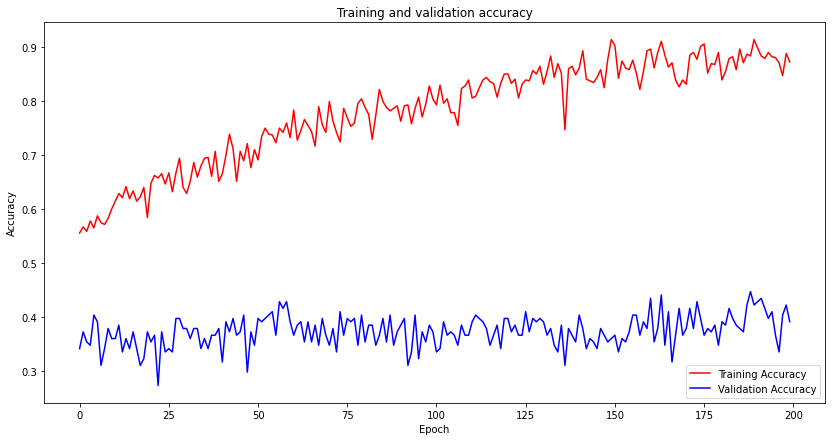

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

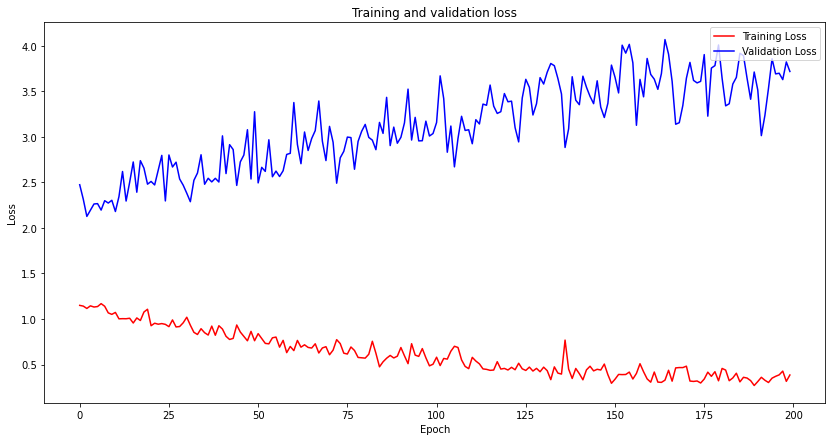

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

#Checking performance on Test Data


In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/Micro_Organism/sample_data/'
test_df = pd.read_csv('/content/Micro_Organism/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

32/32 [==============================] - 0s 3ms/step
[0 0 0 1 1 1 1 2 4 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 3 6 2 7 7 7 0]


In [ ]:
test_df = pd.read_csv('/content/Micro_Organism/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    3
12    3
13    3
14    3
15    4
16    4
17    4
18    4
19    5
20    5
21    5
22    5
23    6
24    6
25    6
26    6
27    7
28    7
29    7
30    7
31    0
Name: labels, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
     

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[4, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 1, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 1, 0, 0, 3, 0],
       [0, 0, 1, 0, 0, 0, 0, 3]])

In [ ]:
train_dir = '/content/bacteria-data/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

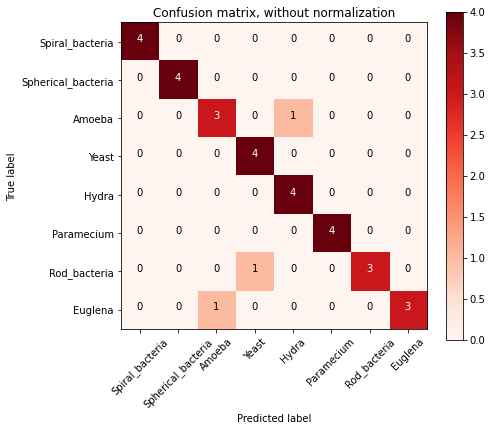

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()